In [1]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed()

m = 1 # dimension
k_squared = 0.04
m_inv = 1.0
learning_rate = 0.001
epochs = 10000
batch_size = 500
x_stddev = 5
test_averaging=100
decay = 1 - 1*1e-10

In [2]:
# declare the training data placeholders
# input x - just one is x0
x0 = tf.placeholder(tf.float32, [None, 1])
x1_best = tf.placeholder(tf.float32, [None, 1])

In [3]:
hidden_out_1 = tf.layers.dense(
  x0, 150, tf.nn.tanh, use_bias=True, name = 'firstlayer')
u1 = tf.layers.dense(
  hidden_out_1, m, activation=tf.identity, use_bias=True, name = 'secondlayer')

x1 = u1 + x0

In [4]:
piecewise_cost = (tf.norm(x1-x1_best)**2) / batch_size
# wits_cost = tf.norm(u1)

adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])


optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(piecewise_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

('Epoch: ', 0, 'Cost: ', 3.9119184)
('Epoch: ', 1, 'Cost: ', 3.8572967)
('Epoch: ', 2, 'Cost: ', 3.84502)
('Epoch: ', 3, 'Cost: ', 3.8398206)
('Epoch: ', 4, 'Cost: ', 3.83892)
('Epoch: ', 5, 'Cost: ', 3.831801)
('Epoch: ', 6, 'Cost: ', 3.8311179)
('Epoch: ', 7, 'Cost: ', 3.8069916)
('Epoch: ', 8, 'Cost: ', 3.8032308)
('Epoch: ', 9, 'Cost: ', 3.7885888)
('Epoch: ', 10, 'Cost: ', 3.788246)
('Epoch: ', 11, 'Cost: ', 3.7918801)
('Epoch: ', 12, 'Cost: ', 3.7930017)
('Epoch: ', 13, 'Cost: ', 3.7887368)
('Epoch: ', 14, 'Cost: ', 3.774867)
('Epoch: ', 15, 'Cost: ', 3.7626054)
('Epoch: ', 16, 'Cost: ', 3.7445629)
('Epoch: ', 17, 'Cost: ', 3.7532642)
('Epoch: ', 18, 'Cost: ', 3.7474177)
('Epoch: ', 19, 'Cost: ', 3.7334764)
('Epoch: ', 20, 'Cost: ', 3.7395039)
('Epoch: ', 21, 'Cost: ', 3.762528)
('Epoch: ', 22, 'Cost: ', 3.7612727)
('Epoch: ', 23, 'Cost: ', 3.7546608)
('Epoch: ', 24, 'Cost: ', 3.754292)
('Epoch: ', 25, 'Cost: ', 3.7633228)
('Epoch: ', 26, 'Cost: ', 3.753496)
('Epoch: ', 27, 'Cost

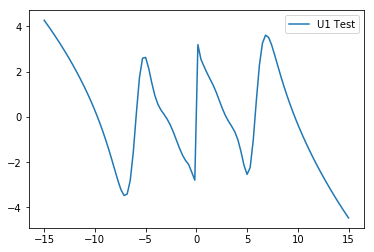

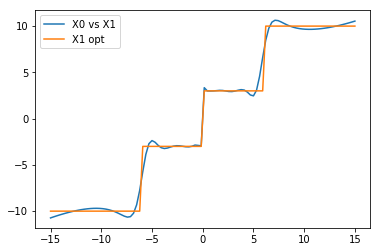

In [5]:
# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    
    x_train = np.random.normal(size=epochs * batch_size * m, scale=x_stddev)
#     x_train = np.zeros(epochs*batch_size*m)
#     set1 = np.random.uniform(-5,5,epochs * batch_size * m // 6)
#     set2_1 = np.random.uniform(-10,-5,epochs * batch_size * m // 6)
#     set2_2 = np.random.uniform(5,10,epochs * batch_size * m // 6)
#     set2 = np.concatenate((set2_1,set2_2))
#     np.random.shuffle(set2)
    
#     set3 = np.random.uniform(-15,15,epochs * batch_size * m // 2)
    
#     x_train = np.concatenate((set1, set2, set3))
#     x_train = np.random.uniform(-15,15,epochs * batch_size * m)
    x1_train = np.zeros(x_train.shape[0])
    for data in range(x_train.shape[0]):
        if x_train[data]<-6:
            x1_train[data]=-10
        elif x_train[data]<0:
            x1_train[data]=-3
        elif x_train[data]<6:
            x1_train[data]=3
        else: x1_train[data]=10
    
    
    for epoch in range(epochs):
#         x_batch = x_train[epoch].reshape(1,1)
        x_batch = x_train[epoch: epoch + (batch_size * m)].reshape((batch_size, m))
        x1_batch = x1_train[epoch: epoch + (batch_size * m)].reshape((batch_size, m))
        _,cost = sess.run([optimizer, piecewise_cost], feed_dict={x0: x_batch, x1_best: x1_batch,
                         adaptive_learning_rate: learning_rate * (decay**epoch)})

        print("Epoch: ", epoch, "Cost: ",cost)

    # Test over a continuous range of X
#     x0_test = np.linspace(-2*x_stddev, 2*x_stddev, num=100)
    x0_test = np.linspace(-15, 15, num=100)
    x1_opt = np.zeros((100,1))
    for data in range(100):
        if x0_test[data]<-6:
            x1_opt[data]=-10
        elif x0_test[data]<0:
            x1_opt[data]=-3
        elif x0_test[data]<6:
            x1_opt[data]=3
        else: x1_opt[data]=10
    u1_test, x1_test = np.zeros((1, 100)), np.zeros((1, 100))

    for i in range(100):
        u1t, x1t = 0, 0
        for _ in range(test_averaging):
          u1tmp, x1tmp = sess.run(
            [u1, x1],
            feed_dict={x0: x0_test[i].reshape((1, 1)), x1_best: x1_opt[i].reshape((1,1))})

          u1t += u1tmp
          x1t += x1tmp

        u1_test[0, i] = u1t / test_averaging
        x1_test[0,i] = x1t / test_averaging
        
    with tf.variable_scope('firstlayer', reuse=True): 
        w1 = tf.get_variable('kernel').eval()
        b1 = tf.get_variable('bias').eval()
    
    with tf.variable_scope('secondlayer', reuse=True):
        w2 = tf.get_variable('kernel').eval()
        b2 = tf.get_variable('bias').eval()

# print(cost)
plt.show()


l1, = plt.plot(x0_test, u1_test[0], label="U1 Test")
plt.legend(handles=[l1])
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
# plt.savefig("figure_u_1.png
plt.show()

plt.clf()
l2, = plt.plot(x0_test, x1_test[0], label="X0 vs X1")
l3, = plt.plot(x0_test, x1_opt, label="X1 opt")
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
plt.legend(handles=[l2, l3])
# plt.savefig("figure_x_1.png")
plt.show()


In [10]:
print('W1: ', w1)
print('W2: ', w2)

w2.shape

('W1: ', array([[ 0.0901572 ,  0.2370918 ,  0.6920835 , -0.45759007, -0.22167274,
        -0.46439773, -0.45912468,  0.6203555 ,  0.0419175 ,  0.60444146,
         4.952244  ,  0.04192306,  0.53345317,  0.22216071, -0.24009007,
         6.301405  , -0.50758445, -0.21116066, -0.37131187, -0.22089699,
         0.04239784,  0.04331616, -0.18591626, -0.22142634, -0.4953288 ,
        -0.23889707,  0.67850924,  0.5476355 , -0.7077681 , -1.0123378 ,
         0.04195131,  0.22627208, -0.1888109 ,  0.21195143,  0.44928712,
         0.04276987, -0.20532611,  0.44252077, -0.04190878,  0.46343717,
        -0.22356562, -0.5474644 ,  0.04206235, -0.7823536 , -0.23852947,
         0.26123488, -0.2369954 , -0.25654712, -0.25827566,  0.5539032 ,
         0.22289808,  0.51685596,  1.0848937 , -0.6088887 , -0.04201594,
         0.21767725, -0.23810348, -0.4646694 , -0.53889185,  1.1317953 ,
         0.2089353 , -0.23368704, -5.6309223 , -0.2510263 ,  0.71514434,
         1.2417319 ,  5.88868   ,  0.49286

(150, 1)

In [8]:
print('B1: ', b1)
print('B2: ', b2)

b1.shape

('B1: ', array([-1.49632066e-01,  2.16088206e-01,  3.65778732e+00, -1.21041000e+00,
       -1.35061651e-01, -1.29561055e+00, -1.22450840e+00, -2.32706118e+00,
       -2.15838999e-02,  3.23842049e+00,  9.99821246e-01,  5.85471094e-02,
        1.77022383e-01,  1.33129925e-01, -2.35600263e-01, -9.69530642e-01,
        7.31552601e-01, -9.77801457e-02, -1.28652573e+00,  2.19140470e-01,
        1.23102725e-01, -1.57810926e-01,  1.53959572e-01, -1.32225156e-01,
       -1.57481730e-01, -2.27377295e-01,  4.70594555e-01,  2.85312033e+00,
        3.12517256e-01,  5.74599028e+00, -2.24734023e-02,  1.56200081e-01,
       -7.49236792e-02,  9.45027769e-02, -9.54202712e-01, -1.19746946e-01,
        1.76245585e-01, -1.47855604e+00,  1.07089831e-02,  1.27336562e+00,
        2.21104607e-01, -1.81072652e-01,  8.26996788e-02, -5.77640235e-01,
       -2.25629151e-01,  3.77086610e-01, -2.16601476e-01, -3.45170379e-01,
       -3.56887221e-01, -5.90745807e-01, -2.19919547e-01, -1.86245930e+00,
        6.390378

(150,)